In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [2]:
df=pd.read_csv("NFLX.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [4]:
sns.set(rc={'figure.figsize':(10,5)})

In [5]:
df['Date']=pd.to_datetime(df['Date'])
df=df.set_index('Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


Text(0.5, 1.0, 'volume of stock vs time')

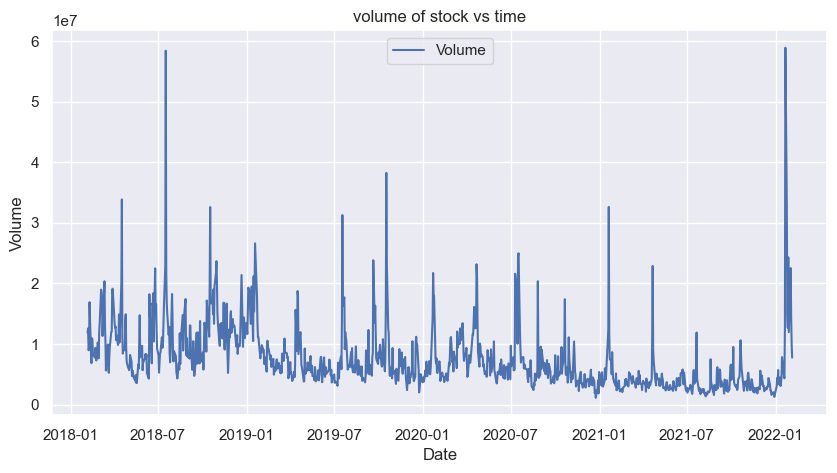

In [6]:
sns.lineplot(x=df.index,y=df['Volume'],label='Volume')
plt.title('volume of stock vs time')

<Axes: title={'center': 'Netflix Stock Price'}, xlabel='Date'>

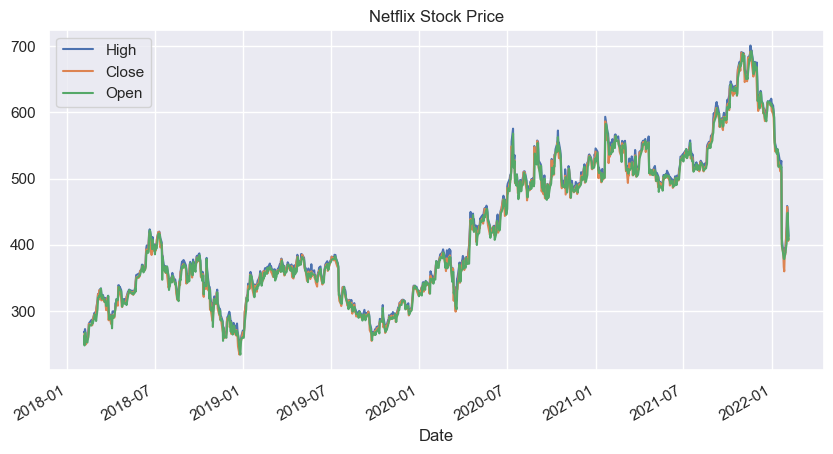

In [7]:
df.plot(y=['High','Close','Open'],title='Netflix Stock Price')

<Axes: xlabel='Year'>

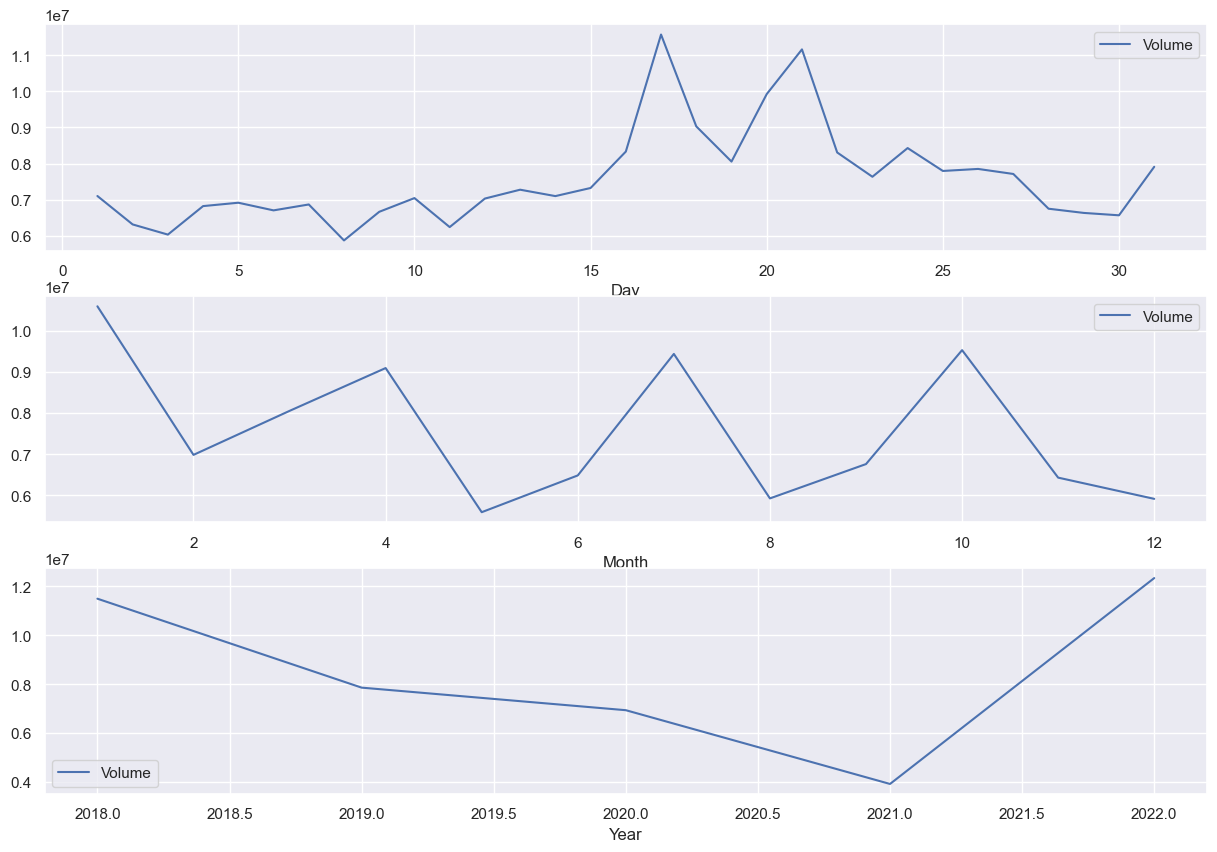

In [10]:
fig,(ax1,ax2,ax3)= plt.subplots(3,figsize=(15,10))
df.groupby(df.index.day).mean().plot(y='Volume',ax=ax1,xlabel='Day')
df.groupby(df.index.month).mean().plot(y='Volume',ax=ax2,xlabel='Month')
df.groupby(df.index.year).mean().plot(y='Volume',ax=ax3,xlabel='Year')

Top 5 Days with highest Stock Price 

In [12]:
a=df.sort_values(by='High',ascending=False).head(5)
a['High']

Date
2021-11-17    700.989990
2021-11-19    694.159973
2021-11-18    691.739990
2021-10-29    690.969971
2021-11-01    689.969971
Name: High, dtype: float64

In [13]:
b=df.sort_values(by='Low',ascending=True).head(5)
b['Low']

Date
2018-12-26    231.229996
2018-12-24    233.679993
2018-02-09    236.110001
2018-12-27    240.100006
2018-12-21    241.289993
Name: Low, dtype: float64

<Axes: xlabel='Date', ylabel='Low'>

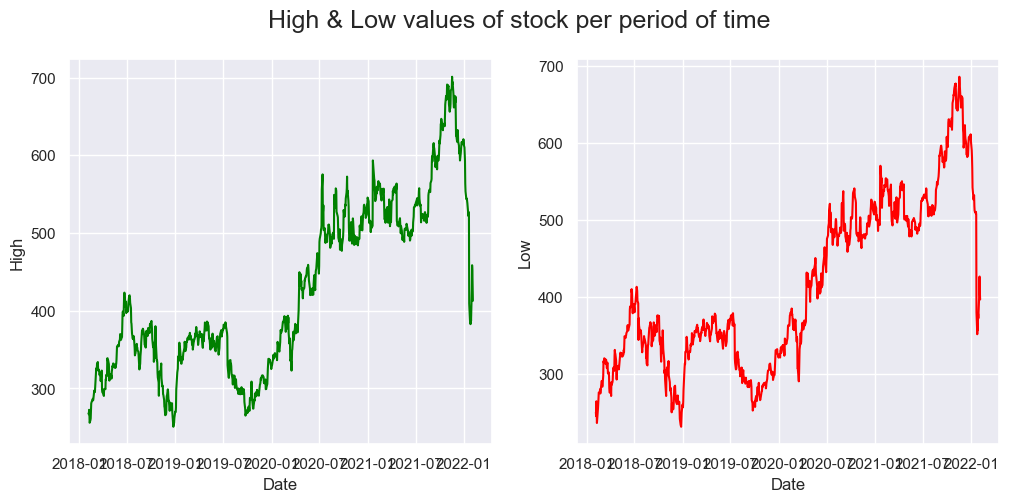

In [17]:
fig,axes=plt.subplots(nrows=1,ncols=2,sharex=True,figsize=(12,5))
fig.suptitle("High & Low values of stock per period of time",fontsize=18)
sns.lineplot(ax=axes[0],y=df['High'],x=df.index,color='green')
sns.lineplot(ax=axes[1],y=df['Low'],x=df.index,color='red')